In [1]:
import os
import numpy as np
import random
from sklearn.preprocessing import StandardScaler


MODEL_SAVE_PATH = "./model_save/"
datasets = ["synthetic", "synthetic_1"]

kpi_nums = [1, 2, 4, 8, 16, 32, 64, 128]
model_type = "usad"
win_size = 100
anomaly_start = 5000
anomaly_end = 6000


## USAD

### Model Training

In [26]:
from anomaly_detection.solvers import UsadSolver

for kpi_num in kpi_nums:
    config = {
        'lr': 1e-4,
        'num_epochs': 10,
        'k': 3,
        'win_size': win_size,
        'input_c': kpi_num,
        'output_c': kpi_num,
        'hidden_size': 20,


        'batch_size': 1024,
        'patience': 3,

        'anomaly_ratio': 4.00,

        'dataset': 'synthetic',
        'scaler': 'minmax',
        'model_save_path': './model_save/',
        'data_path': f'./dataset/synthetic/{kpi_num}',
        'output_dir': f'./output/usad/synthetic/{kpi_num}',
        'model_name': f'usad_synthetic_{kpi_num}',
        'mode': 'train',

        'inspect_scores': True,
        'save_output': True,
    }

    print("kpi_num: ", kpi_num)
    solver = UsadSolver(config)

    solver.train()


kpi_num:  1
config:  {'lr': 0.0001, 'num_epochs': 10, 'k': 3, 'win_size': 100, 'input_c': 1, 'output_c': 1, 'hidden_size': 20, 'batch_size': 1024, 'patience': 3, 'anomaly_ratio': 4.0, 'dataset': 'synthetic', 'scaler': 'minmax', 'model_save_path': './model_save/', 'data_path': './dataset/synthetic/1', 'output_dir': './output/usad/synthetic/1', 'model_name': 'usad_synthetic_1', 'mode': 'train', 'inspect_scores': True, 'save_output': True}
w_size:  100 z_size:  2000
======================TRAIN MODE======================
Epoch: 1 cost time: 0.3725860118865967
Validation loss decreased (inf --> 0.068173).  Saving model ...
Epoch [0], val_loss1: 0.0682, val_loss2: 0.0676
Epoch: 2 cost time: 0.33185720443725586
Validation loss decreased (0.068173 --> 0.067590).  Saving model ...
Epoch [1], val_loss1: 0.0676, val_loss2: -0.0018
Epoch: 3 cost time: 0.33864617347717285
Validation loss decreased (0.067590 --> 0.065457).  Saving model ...
Epoch [2], val_loss1: 0.0655, val_loss2: -0.0240
Epoch: 4 c

### Model Testing

In [2]:
from anomaly_detection.solvers import UsadSolver


for kpi_num in kpi_nums:
    config = {
        'lr': 1e-4,
        'num_epochs': 10,
        'k': 3,
        'win_size': win_size,
        'input_c': kpi_num,
        'output_c': kpi_num,
        'hidden_size': 20,


        'batch_size': 1024,
        'patience': 3,

        'anomaly_ratio': 4.00,

        'dataset': 'synthetic',
        'scaler': 'minmax',
        'model_save_path': './model_save/',
        'data_path': f'./dataset/synthetic/{kpi_num}',
        'output_dir': f'./output/usad/synthetic/{kpi_num}',
        'model_name': f'usad_synthetic_{kpi_num}',
        'mode': 'test',

        'inspect_scores': True,
        'save_output': True,
    }

    print("kpi_num: ", kpi_num)
    solver = UsadSolver(config)

    solver.test()


kpi_num:  1
config:  {'lr': 0.0001, 'num_epochs': 10, 'k': 3, 'win_size': 100, 'input_c': 1, 'output_c': 1, 'hidden_size': 20, 'batch_size': 1024, 'patience': 3, 'anomaly_ratio': 4.0, 'dataset': 'synthetic', 'scaler': 'minmax', 'model_save_path': './model_save/', 'data_path': './dataset/synthetic/1', 'output_dir': './output/usad/synthetic/1', 'model_name': 'usad_synthetic_1', 'mode': 'test', 'inspect_scores': True, 'save_output': True}
w_size:  100 z_size:  2000


/home/xingjian/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/xingjian/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


anomaly events: 1 anomaly events hits: 0
origin positives: 0 predicted events: 0
anomaly_ratio:  4.0 threshold:  0.3664458096027374 accuracy:  0.899000100999899
   precision  recall   f1
0        0.0     0.0  0.0
1        0.0     0.0  0.0
2        0.0     0.0  0.0
test time: 1.3033
kpi_num:  2
config:  {'lr': 0.0001, 'num_epochs': 10, 'k': 3, 'win_size': 100, 'input_c': 2, 'output_c': 2, 'hidden_size': 20, 'batch_size': 1024, 'patience': 3, 'anomaly_ratio': 4.0, 'dataset': 'synthetic', 'scaler': 'minmax', 'model_save_path': './model_save/', 'data_path': './dataset/synthetic/2', 'output_dir': './output/usad/synthetic/2', 'model_name': 'usad_synthetic_2', 'mode': 'test', 'inspect_scores': True, 'save_output': True}
w_size:  200 z_size:  2000
anomaly events: 1 anomaly events hits: 1
origin positives: 793 predicted events: 1
anomaly_ratio:  4.0 threshold:  0.18841171860694877 accuracy:  0.9997980002019998
   precision  recall        f1
0   0.997478   0.791  0.882320
1   0.998004   1.000  0

### Visualize

In [3]:
model_type = "usad"

In [30]:
def load_output_data(dataset, kpi_num):
    reconstruction_result_path = f'./output/{model_type}/{dataset}/{kpi_num}/'
    
    input_data = np.load(os.path.join(reconstruction_result_path, "inputs.npy"))
    output_w1_data = np.load(os.path.join(reconstruction_result_path, "outputs_w1.npy"))
    output_w2_data =  np.load(os.path.join(reconstruction_result_path, "outputs_w2.npy"))
    score_per_kpi = np.load(os.path.join(reconstruction_result_path, "results_per_kpi.npy"))
    
    return input_data, output_w1_data, output_w2_data, score_per_kpi

In [31]:
dataset = "synthetic"
kpi_num = 2

input_data, output_w1_data, output_w2_data, score_per_kpi = load_output_data(
    dataset, kpi_num)

input_data = input_data.reshape(-1, win_size, kpi_num)
output_w1_data = output_w1_data.reshape(-1, win_size, kpi_num)
output_w2_data = output_w2_data.reshape(-1, win_size, kpi_num)
score = np.mean(score_per_kpi, axis=1)

concat_input_data = input_data[np.arange(int(9901/win_size),)*win_size].reshape(-1, 2)
concat_output_w1_data = output_w1_data[np.arange(int(9901/win_size),)*win_size].reshape(-1, 2)
concat_output_w2_data = output_w2_data[np.arange(int(9901/win_size),)*win_size].reshape(-1, 2)

print("input_data.shape", input_data.shape)
print("output_w1_data.shape", output_w1_data.shape)
print("output_w2_data.shape", output_w2_data.shape)
print("score_per_kpi.shape", score_per_kpi.shape)
print("score.shape", score.shape)
print("concat_input_data.shape", concat_input_data.shape)
print("concat_output_w1_data.shape", concat_output_w1_data.shape)
print("concat_output_w2_data.shape", concat_output_w2_data.shape)

input_data.shape (9901, 100, 2)
output_w1_data.shape (9901, 100, 2)
output_w2_data.shape (9901, 100, 2)
score_per_kpi.shape (9901, 2)
score.shape (9901,)
concat_input_data.shape (9900, 2)
concat_output_w1_data.shape (9900, 2)
concat_output_w2_data.shape (9900, 2)


#### Reconstruction

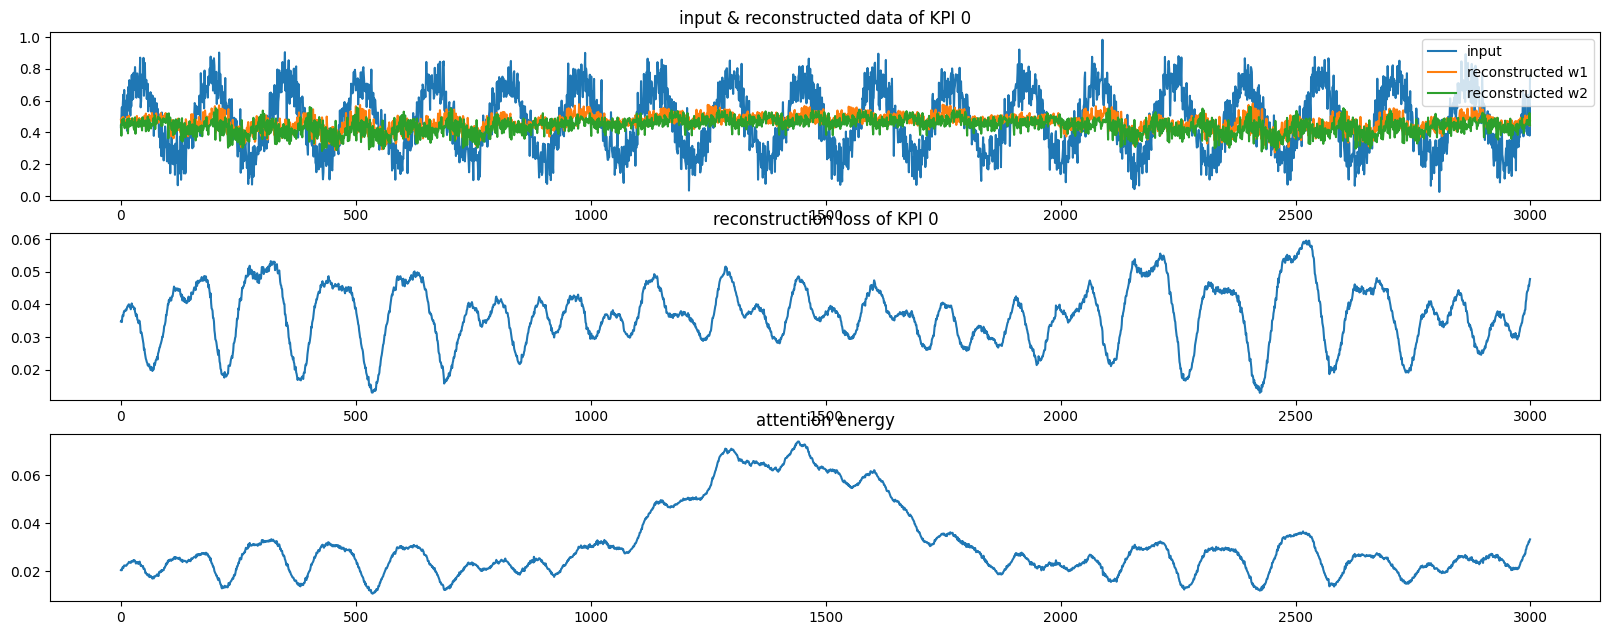

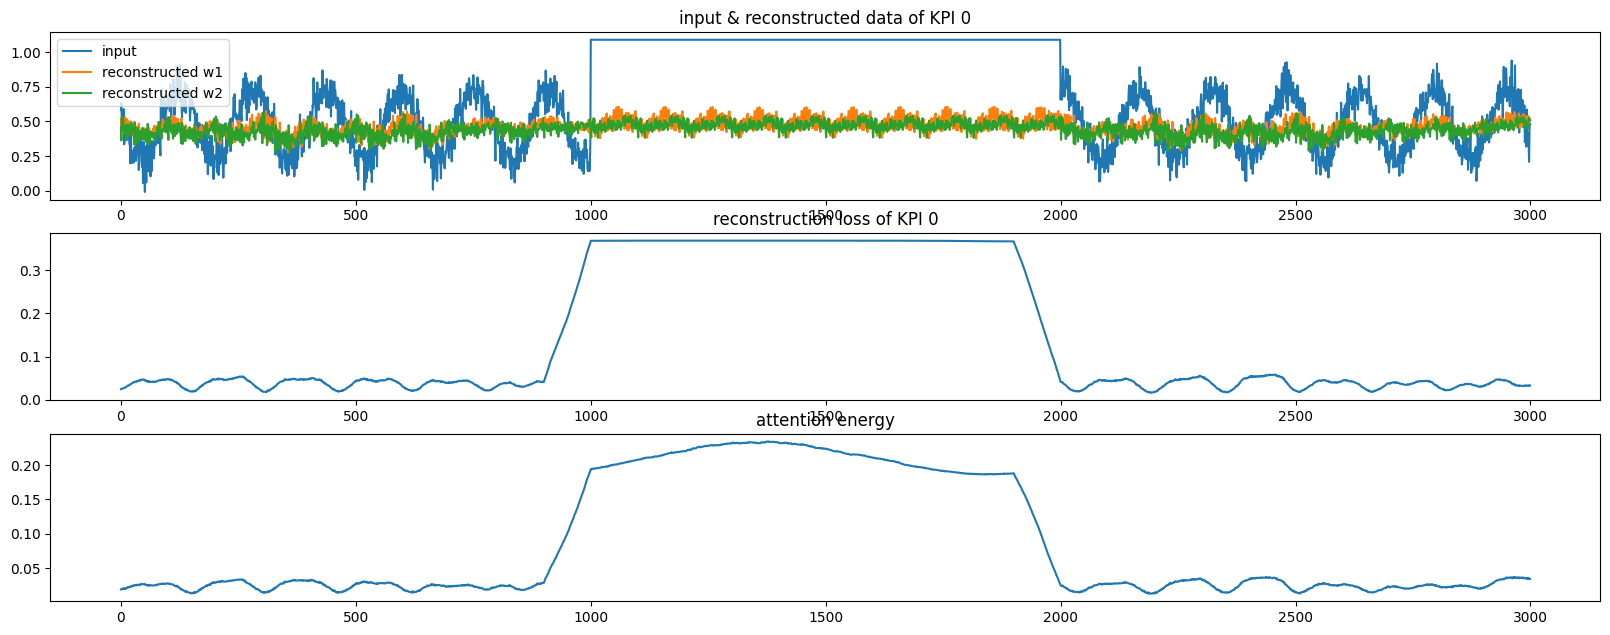

In [32]:
import matplotlib.pyplot as plt


def plot_values(start, end):
    plt.figure(figsize=(20, 10))
    plt.subplot(4, 1, 1)
    plt.plot(concat_input_data[start:end, 0], label="input")
    plt.plot(concat_output_w1_data[start:end, 0], label="reconstructed w1")
    plt.plot(concat_output_w2_data[start:end, 0], label="reconstructed w2")
    plt.title("reconstructed data")
    plt.legend()
    plt.title("input & reconstructed data of KPI 0")

    plt.subplot(4, 1, 2)

    plt.plot(
        score_per_kpi[start:end, 0], label="reconstruction loss")
    plt.title("reconstruction loss of KPI 0")

    plt.subplot(4, 1, 3)
    plt.plot(score[start:end])
    plt.title("attention energy")

# Normal State
plot_values(0, 3000)

# Anomaly State
plot_values(anomaly_start - 1000, anomaly_end + 1000)


Text(0.5, 1.0, 'Reconstruction Losses')

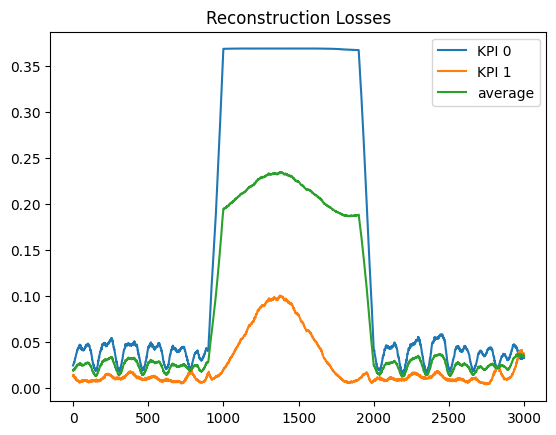

In [33]:
padding = 1000
start = anomaly_start - padding 
end = anomaly_end + padding
for i in range(0, kpi_num):
    plt.plot(score_per_kpi[start:end, i], label=f"KPI {i}")

reconstruction_loss_avg = np.mean(score_per_kpi, axis=1)
plt.plot(reconstruction_loss_avg[start:end], label="average")

plt.legend()

plt.title("Reconstruction Losses")

#### Anomaly Score

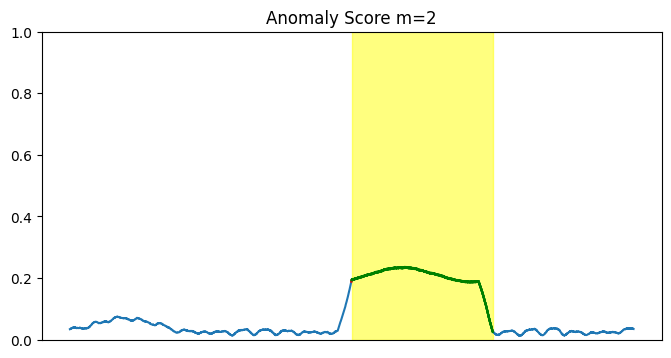

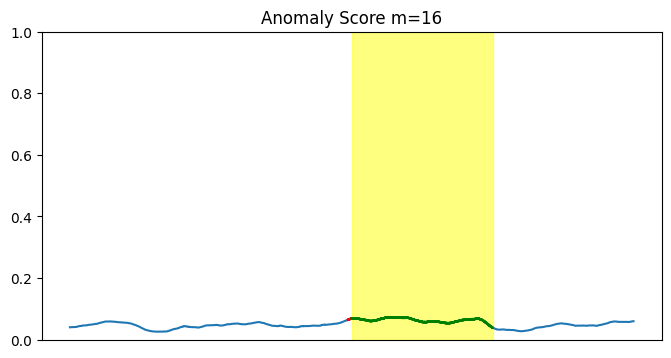

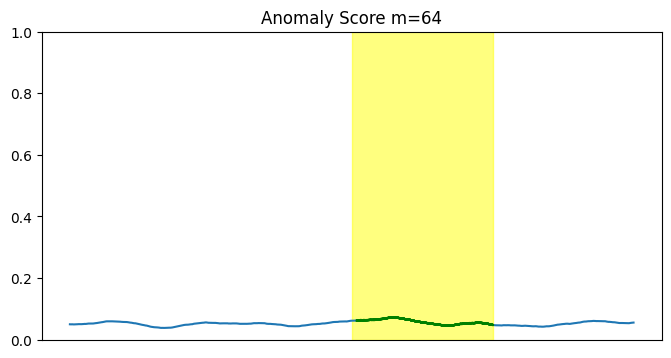

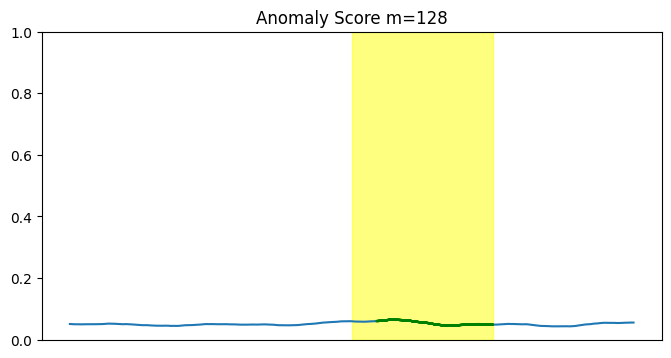

In [6]:
import matplotlib.pyplot as plt

plot_start = 3000
plot_end = 7000


dataset = "synthetic"
test_data = np.load(f"./dataset/{dataset}/1/test.npy")
test_labels = np.load(f"./dataset/{dataset}/1/labels.npy")


def plot_score(score, pred, test_labels, plot_start, plot_end, anomaly_start, anomaly_end):
    # anomaly score
    plt.plot(np.arange(plot_start, plot_end), score[plot_start:plot_end])

    # anomaly period
    plt.fill_between([anomaly_start, anomaly_end],
                     0, 4, alpha=0.5, color='yellow')

    # prediction result
    for i in range(plot_start, plot_end):
        if pred[i] == 1:
            if test_labels[i] == 1:
                plt.plot([i-1, i, i+1], score[i-1:i+2], color='green')
                # plt.axvline(i, color='red')
            else:
                plt.plot([i-1, i, i+1], score[i-1:i+2], color='red')

    plt.ylim(0, np.ceil(np.max(score)))
    plt.xticks([])


kpi_num_plot_set = [2, 16, 64, 128]

for i, kpi_num in enumerate(kpi_num_plot_set):
    plt.figure(figsize=(8, 4))
    # plt.subplot(len(kpi_num_plot_set), 1, i+1)
    result_path = f'./output/{model_type}/{dataset}/{kpi_num}/'

    pred = np.load(os.path.join(result_path, "pred.npy"))
    score_per_kpi = np.load(os.path.join(result_path, "results_per_kpi.npy"))
    score = np.mean(score_per_kpi, axis=1)

    plot_score(score, pred, test_labels, plot_start, plot_end,
               anomaly_start=anomaly_start, anomaly_end=anomaly_end)

    plt.title(f"Anomaly Score m={kpi_num}")
